In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
class AdvData:
    # Use this cell to define all the methods and attributes you need for the AdvData class.
    # I would suggest starting with the functionality required for Part 1 in order to get 
    # a feel for defining and using Classes. Once you  have finished that, you can come back
    # to the class definition and implement the Goring & Nikora algorithm. 

    def __init__(self, file_path):
        
        self.data = pd.read_csv(file_path)
        self.t = np.array([self.data[self.data.columns[0]]])
        self.u=np.array([self.data[self.data.columns[1]]])
        self.u_filtered_simple=self.data.copy()

    def get_u(self):
        return self.u
        
    def get_t(self):
        return self.t
        
    def get_data(self):
        return self.data

    def createTimeSeries(self):
        fig = plt.figure()
        self.data.hist(t, bins="auto", figsize=(10,8))

    def plot_histogram(self):
            plt.hist(self.data['U'], bins="auto")
            plt.show()
    def plot_timeseries(self):
            plt.plot(self.data['time'], self.data['U'])
            plt.show()  
    def threshold(self):
        self.u_filtered_simple['U'] = np.where(self.u_filtered_simple['U'] >1, np.nan, self.u_filtered_simple['U'])
        print("The Number of Nan: ", self.u_filtered_simple['U'].isna().sum())

    def plot_timeseries2(self):
        plt.plot(self.data['time'], self.data['U'], color="blue")
        plt.plot(self.u_filtered_simple['time'], self.u_filtered_simple['U'], color="orange")
        plt.show() 
        
    def algorithm(self):
        u=self.u_filtered_simple['U']
        t=self.u_filtered_simple['time']
        n=len(u)
        u = np.where(u >1, np.nan, u)
        u = u[~np.isnan(u)]
        theta = np.linspace(0, 2*np.pi, 100)
        sum_u=np.sum(u)
        dydx = np.gradient(u)/2
        d2ydx2 = np.gradient(dydx)/2
        numerator=sum_u*d2ydx2
        denomenator=np.sum(d2ydx2)
        angle = np.arctan(numerator/denomenator) 

        sd_u = np.std(u)
        sd_dydx=np.std(dydx)
        sd_d2ydx2=np.std(d2ydx2)
        lamb=np.sqrt(np.log(2*n))
        a1=lamb*sd_u
        b1=lamb*sd_dydx
        num=np.square(a1*np.sin(angle))-np.square(b1*np.cos(angle))
        den=np.square(np.sin(angle))-np.square(np.cos(angle))
        a2=np.average(np.square(num/den))
        num2=np.square(a1*np.sin(angle))-np.square(b1*np.cos(angle))
        den2=np.square(np.sin(angle))-np.square(np.cos(angle))
        b2=np.average(np.square(num2/den2))
        a3=lamb*sd_dydx
        b3=lamb*sd_d2ydx2
        
        theta = np.linspace(0, 2*np.pi, 100000)
        plot1 =plt.plot( np.nanmean(u)+a1*np.cos(theta) , np.nanmean(dydx)+b1*np.sin(theta), color="orange")
        plot1=plt.scatter(u,dydx)
        plot1=plt.xlabel("u")
        plot1=plt.ylabel("dydx")
        plt.show()
        
        plot2=plt.plot(np.nanmean(u)+a1*np.cos(theta), np.nanmean(d2ydx2)+b3*np.sin(theta), color="orange")
        plot2=plt.scatter(u,d2ydx2)
        plot2=plt.xlabel("u")
        plot2=plt.ylabel("d2ydx2")
        plt.show()
        
        plot3=plt.plot( np.nanmean(dydx)+a3*np.cos(theta) , np.nanmean(d2ydx2)+b3*np.sin(theta), color="orange")
        plot3=plt.scatter(dydx,d2ydx2)
        plot3=plt.xlabel("dydx")
        plot3=plt.ylabel("d2ydx2")
        plt.show()
        

Use as many markdown and code cells as you need to answer the questions in the assignment

In [3]:
path="https://raw.githubusercontent.com/jpelayo35/assignment4/refs/heads/main/adv.csv"
d=AdvData(path)

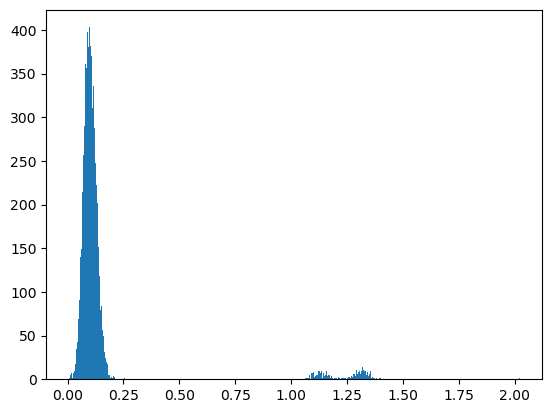

In [4]:
d.plot_histogram()

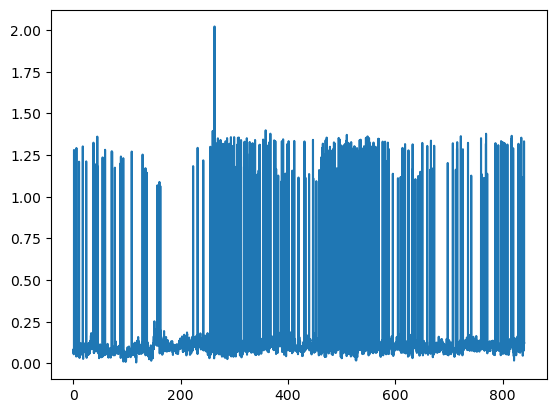

In [5]:
d.plot_timeseries()

2. The histogram is much easier to see the outliers compared to the timeseries. It may be easier to see in the time series if there were less values, but right now it just looks very messy.

In [6]:
d.threshold()

The Number of Nan:  324


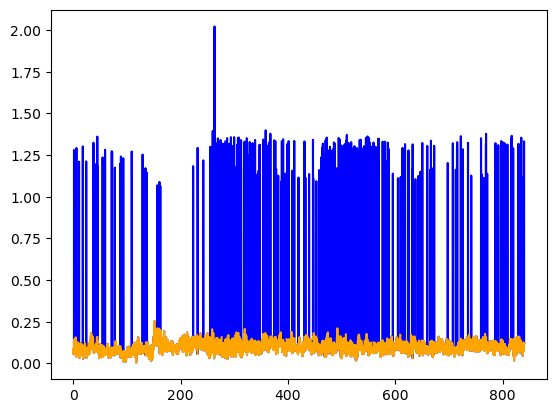

In [7]:
d.plot_timeseries2()

3. The total number of "bad" data points is 324. That is approximately 5% (since thte total number of data is 6720).

4. This is much easier to see the outliers and to see that most of the "good" data is below 0.25. Without the orange bars, it looks as though a lot of the data is greater than 1.

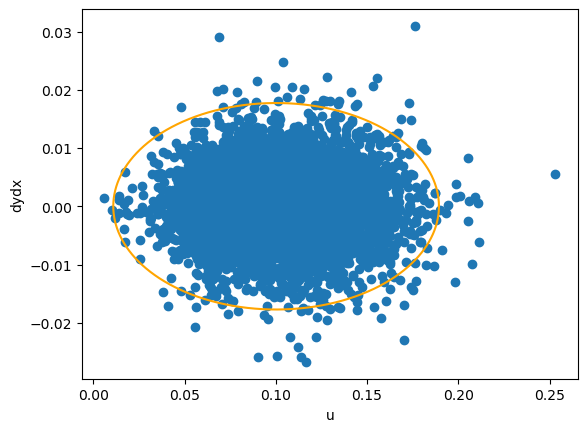

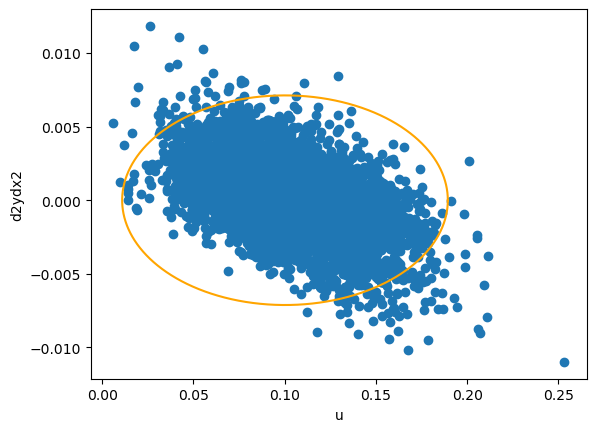

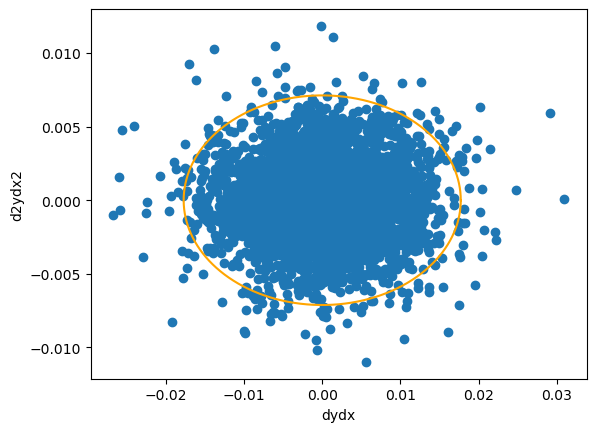

In [8]:
d.algorithm()

Part 2: This took 3 iterations. The algorithm outliers are a bit stricter with the criteria, but seem to hold a lot of the data points in a circle. The visual outliers from part 1 were not terrible, but were much harder to differentiate what an outlier was.
